In [1]:
from datetime import date
print('created 2022-10-16')
print("last updated", date.today())

created 2022-10-16
last updated 2025-01-23


In [2]:
# imports

import sys
import time
import pickle
import random
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import gaussian_kde
from matplotlib.ticker import PercentFormatter
from scipy.spatial.distance import pdist, squareform

sys.path.append("/Users/emmakowal/Dropbox (MIT)/Lab/Cluster/IME/scripts")
from functions import *
from constants import *

import warnings
warnings.filterwarnings(action='once')

# path to i/o:
outpath = '/Users/emmakowal/Dropbox (MIT)/Lab/'

# aesthetics

%matplotlib inline
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'regular'
plt.rcParams['figure.dpi']= 200

sns.set_palette("husl", 5)
def nicecolors(n, m=5):
    return sns.color_palette("husl", m)[n]

In [3]:
import fcsparser

# function to read fcs data
def fcs_to_list(path):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    return list(data.iloc[:,0])

# function to read FITC and PE
def fcs_to_list_with_dTom(path):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    return list(data.iloc[:,0]), list(data.iloc[:,1])

def fcs_to_list_dTom_only(path):
    meta, data = fcsparser.parse(path, meta_data_only=False, reformat_meta=True)
    return list(data.iloc[:,1])

# round 2

In [4]:
# import data from .fcs files for each sample, store as dict
dox_GFP = {}
dox_GD = {}
dox_dT = {}
samples = []
doxes = ['0','05','1','2','4','8','12','16']
for cell in ['intronless','FH2','UbC']:
    for dox in doxes:
        samples.append(cell+'_'+dox)

samples.append('A2')
samples.remove('UbC_16')

for sample in samples:
    wd = outpath+'FACS/2023/October/dox_exp_round_2/dox_exp_round_2/'
    samppath = wd+'HEK_%s_horizontal singles.fcs' % sample
    dox_GFP[sample] = list(fcs_to_list(samppath))
    dox_GD[sample] = list(fcs_to_list_with_dTom(samppath))
    dox_dT[sample] = list(fcs_to_list_dTom_only(samppath))

# truncate to make all same length
for sample in samples:
    dox_GFP[sample] = dox_GFP[sample][:8600]
    dox_dT[sample] = dox_dT[sample][:8600]
    dox_GD[sample] = [dox_GD[sample][0][:8600],dox_GD[sample][1][:8600]]

# convert dict to df, store as .csv
csv_df = pd.DataFrame.from_dict(dox_GFP, orient='columns')
csv_df.to_csv(wd+'dox_exp_round_2_GFP_only_10-24-23.csv', index=False)
csv_gd_df = pd.DataFrame.from_dict(dox_GD, orient='columns')
csv_gd_df.index = ['GFP','dTomato']
csv_gd_df.to_csv(wd+'dox_exp_round_2_10-24-23.csv', index=False)

In [5]:
csv_gd_df

,intronless_0,intronless_05,intronless_1,intronless_2,intronless_4,intronless_8,intronless_12,intronless_16,FH2_0,FH2_05,...,FH2_12,FH2_16,UbC_0,UbC_05,UbC_1,UbC_2,UbC_4,UbC_8,UbC_12,A2
GFP,"[181.69810485839844, 117.01939392089844, 334.6...","[162.70921325683594, 172.473876953125, 309.125...","[231.83071899414062, 139.3402099609375, 45.375...","[150.61961364746094, 355.8915710449219, 79.573...","[226.16055297851562, 1629.3182373046875, 692.1...","[110.73652648925781, 407.77191162109375, 1081....","[736.96240234375, 1615.39013671875, 1272.27404...","[737.7756958007812, 794.6566772460938, 4470.31...","[624.776123046875, 450.7080078125, 424.4847412...","[8825.298828125, 3978.46826171875, 1114.084960...",...,"[1344.608154296875, 2040.4981689453125, 8183.5...","[687.3502807617188, 12329.556640625, 5386.6674...","[276.7918395996094, 1839.4576416015625, 765.32...","[406.285400390625, 4065.797607421875, 205.2250...","[816.921142578125, 3354.251220703125, 1091.922...","[2480.04248046875, 14412.244140625, 2798.45434...","[10611.33203125, 112.10993957519531, 805.07727...","[180.24009704589844, 37044.75390625, 107.61850...","[396.36224365234375, 11596.2529296875, 14599.4...","[121.87124633789062, 148.4182586669922, 154.91..."
dTomato,"[10934.470703125, 4191.35205078125, 4749.99609...","[1782.9957275390625, 4662.5009765625, 7148.821...","[3901.60986328125, 855.3118896484375, 835.1697...","[4084.732177734375, 3646.496826171875, 2467.76...","[5547.2958984375, 23025.140625, 5212.7578125, ...","[2875.629638671875, 2527.430419921875, 6739.36...","[16142.5888671875, 18425.009765625, 10368.5195...","[6001.54296875, 7322.53955078125, 25651.435546...","[6794.33154296875, 6022.57470703125, 3788.3181...","[8004.32421875, 6766.75537109375, 4770.5195312...",...,"[1912.9986572265625, 7708.35400390625, 4064.33...","[6608.79443359375, 15460.04296875, 5533.253417...","[1003.2329711914062, 15650.6630859375, 6807.23...","[2019.2374267578125, 7150.91796875, 2528.19287...","[6487.6875, 4172.2265625, 2677.130615234375, 4...","[6152.005859375, 5686.638671875, 3192.18603515...","[13769.052734375, 1444.5181884765625, 3812.399...","[1025.59912109375, 14074.6806640625, 704.19580...","[2735.015625, 7171.44140625, 8640.994140625, 2...","[29.639692306518555, 10.599196434020996, 28.96..."


In [6]:
csv_df.rename(columns={'A2':'A2_0'}, inplace=True)
dTom_csv_df = pd.DataFrame.from_dict(dox_dT, orient='columns')
dTom_csv_df.rename(columns={'A2':'A2_0'}, inplace=True)

In [7]:
# normalize everything to background by subtracting median parental cell fluorescence
neg_ctrl = np.median(csv_df['A2_0'])
columns_to_keep = [col for col in csv_df.columns if col != 'A2_0']
norm_df = csv_df[columns_to_keep].sub(neg_ctrl)

dT_neg_ctrl = np.median(dTom_csv_df['A2_0'])
dT_norm_df = dTom_csv_df[columns_to_keep].sub(dT_neg_ctrl)

In [8]:
# melt dict for plotting
plot_df = pd.melt(norm_df, var_name='Key', value_name='Value')

# add log10 column
plot_df['log_Value'] = [np.log10(v) for v in plot_df.Value]
plot_df['cell'] = [x.split('_')[0] for x in plot_df.Key]
plot_df['dox'] = [x.split('_')[1] for x in plot_df.Key]

/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_29453/3013938982.py:5: RuntimeWarning: invalid value encountered in log10
  plot_df['log_Value'] = [np.log10(v) for v in plot_df.Value]


In [9]:
# melt dict for plotting
dT_plot_df = pd.melt(dT_norm_df, var_name='Key', value_name='Value')

# add log10 column
dT_plot_df['log_Value'] = [np.log10(v) for v in dT_plot_df.Value]
dT_plot_df['cell'] = [x.split('_')[0] for x in dT_plot_df.Key]
dT_plot_df['dox'] = [x.split('_')[1] for x in dT_plot_df.Key]

/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_29453/809473204.py:5: RuntimeWarning: invalid value encountered in log10
  dT_plot_df['log_Value'] = [np.log10(v) for v in dT_plot_df.Value]
/var/folders/q5/vnz9dxbd47dfym4t1ss4cfhc0000gn/T/ipykernel_29453/809473204.py:5: RuntimeWarning: divide by zero encountered in log10
  dT_plot_df['log_Value'] = [np.log10(v) for v in dT_plot_df.Value]


In [10]:
plot_df['dT_log_Value'] = dT_plot_df.log_Value
plot_df['dTom'] = dT_plot_df.Value

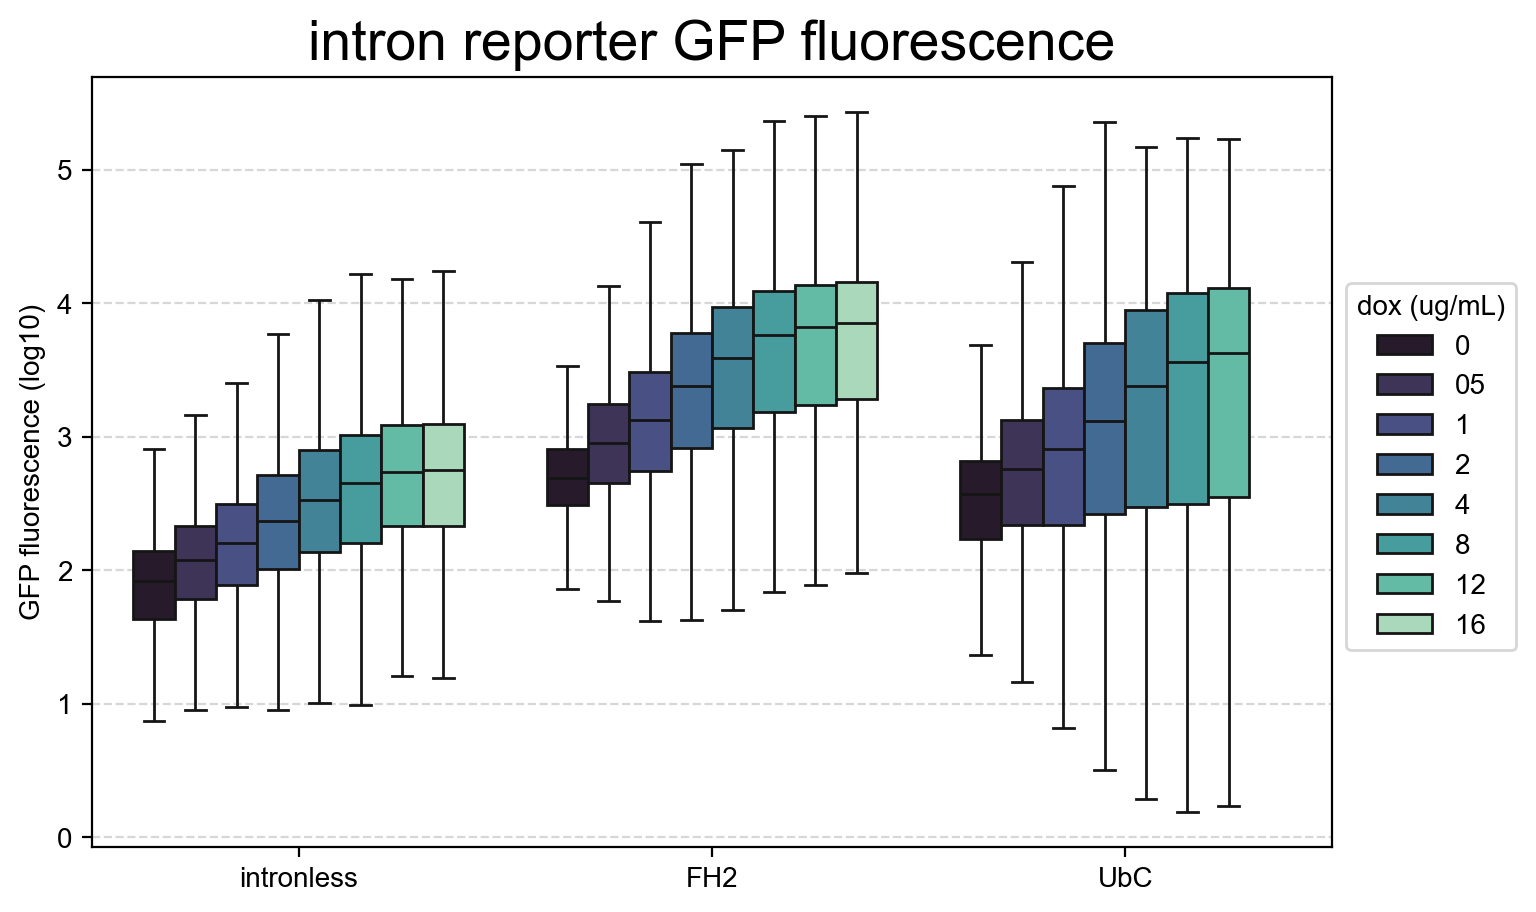

In [11]:
ax = plt.figure(figsize=(8,5))

plt.grid(axis='y', alpha=0.5, linestyle='--')

ax = sns.boxplot(x='cell', y='log_Value', hue='dox', data=plot_df, 
                 width=0.8, fliersize=0.4, palette='mako', showfliers=False)

ax.set_ylabel('GFP fluorescence (log10)')
ax.set_xlabel('')
ax.set_title('intron reporter GFP fluorescence',fontsize=20)
#ax.set_xticklabels(samples, rotation=30)
ax.legend(title='dox (ug/mL)', bbox_to_anchor=(1.,0.75), 
          fontsize=10)
#ax.set_yticks(range(2,5))
#ax.set_yticklabels(['$10^%i$' % i for i in range(2,5)])

#ax.set_xticklabels(samplenames2plot, rotation=30)

plt.show()

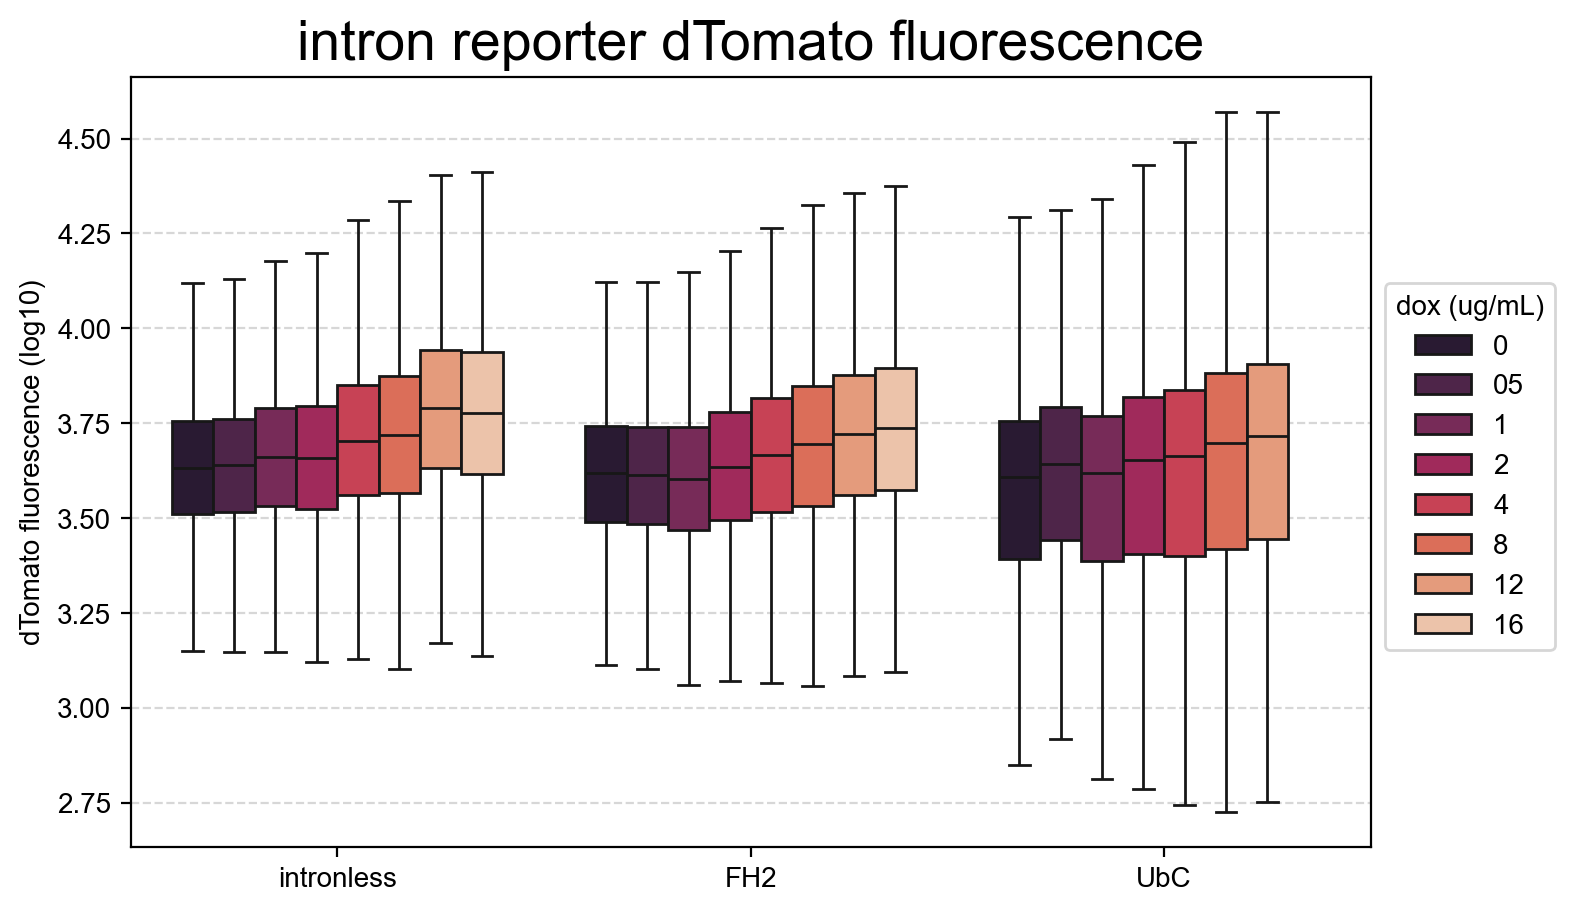

In [12]:
ax = plt.figure(figsize=(8,5))

plt.grid(axis='y', alpha=0.5, linestyle='--')

ax = sns.boxplot(x='cell', y='dT_log_Value', hue='dox', data=plot_df, 
                 width=0.8, fliersize=0.4, palette='rocket', showfliers=False)

ax.set_ylabel('dTomato fluorescence (log10)')
ax.set_xlabel('')
ax.set_title('intron reporter dTomato fluorescence',fontsize=20)
#ax.set_xticklabels(samples, rotation=30)
ax.legend(title='dox (ug/mL)', bbox_to_anchor=(1.,0.75), 
          fontsize=10)
#ax.set_yticks(range(2,5))
#ax.set_yticklabels(['$10^%i$' % i for i in range(2,5)])

#ax.set_xticklabels(samplenames2plot, rotation=30)

plt.show()

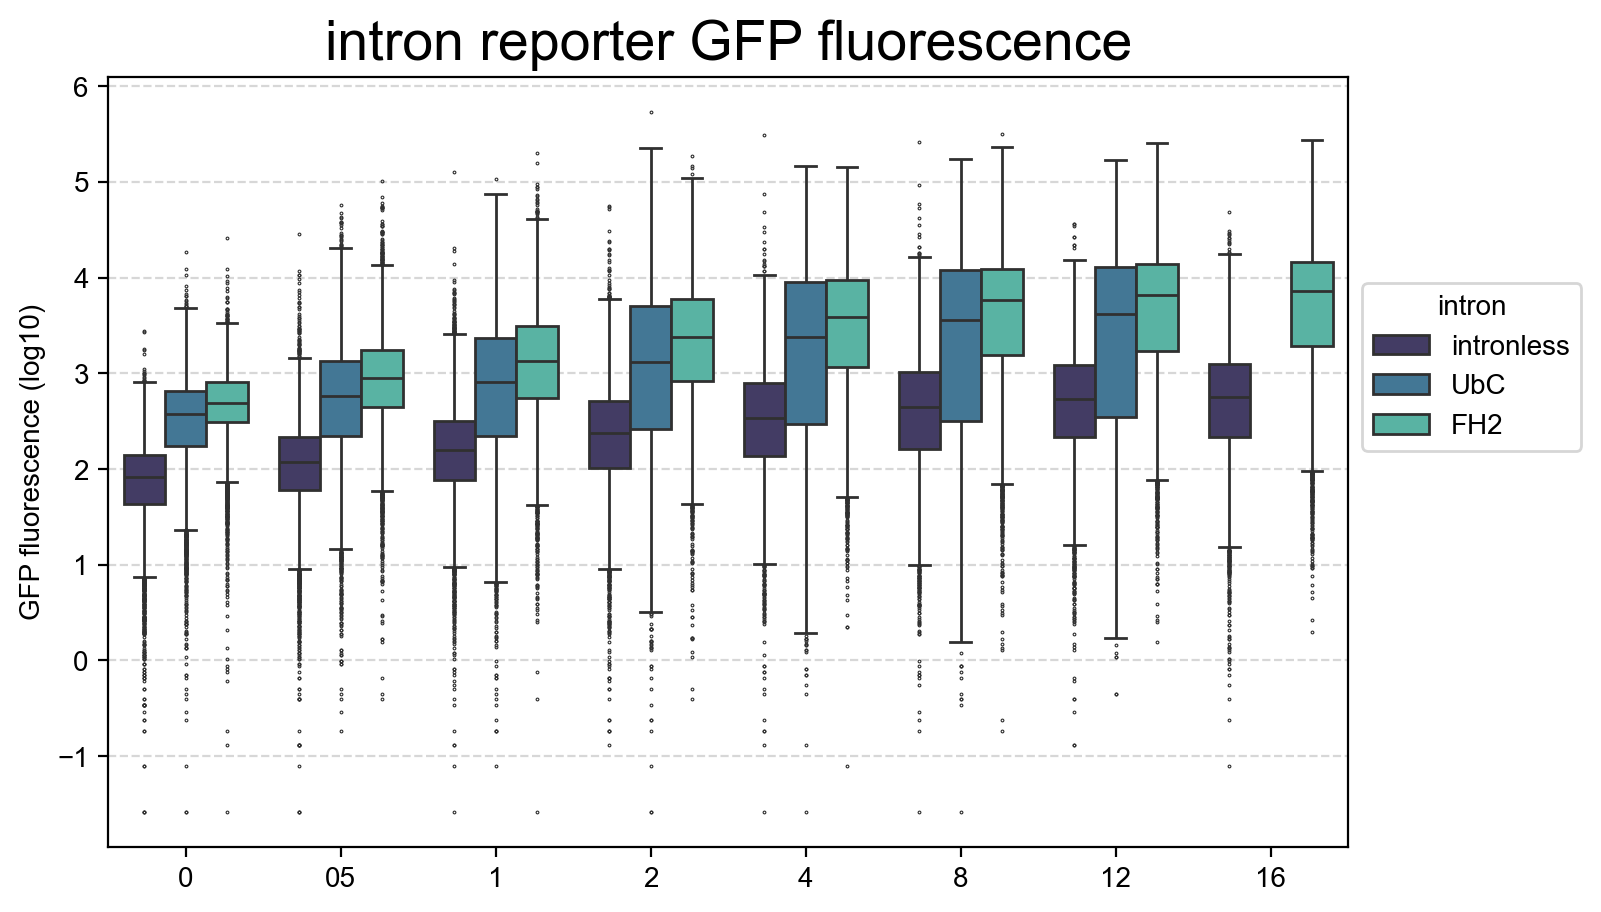

In [13]:
ax = plt.figure(figsize=(8,5))

plt.grid(axis='y', alpha=0.5, linestyle='--')

ax = sns.boxplot(x='dox', y='log_Value', hue='cell', data=plot_df, 
                 width=0.8, fliersize=0.4, palette='mako',
                hue_order = ['intronless','UbC','FH2'])

ax.set_ylabel('GFP fluorescence (log10)')
ax.set_xlabel('')
ax.set_title('intron reporter GFP fluorescence',fontsize=20)
#ax.set_xticklabels(samples, rotation=30)
ax.legend(title='intron', bbox_to_anchor=(1.,0.75), fontsize=10)
#ax.set_yticks(range(2,5))
#ax.set_yticklabels(['$10^%i$' % i for i in range(2,5)])

#ax.set_xticklabels(samplenames2plot, rotation=30)

plt.show()

In [14]:
plot_df['ratio'] = plot_df.Value/plot_df.dTom
plot_df

,Key,Value,log_Value,cell,dox,dT_log_Value,dTom,ratio
0,intronless_0,49.427399,1.693968,intronless,0,4.037406,10899.496471,0.004535
1,intronless_0,-15.251312,NaN,intronless,0,3.618715,4156.377819,-0.003669
2,intronless_0,202.414658,2.306242,intronless,0,3.673484,4715.021862,0.042930
3,intronless_0,15.361115,1.186423,intronless,0,3.901769,7975.703014,0.001926
4,intronless_0,112.934875,2.052828,intronless,0,3.764310,5811.785534,0.019432
...,...,...,...,...,...,...,...,...
197795,UbC_12,31.901871,1.503816,UbC,12,2.878031,755.145580,0.042246
197796,UbC_12,4917.481735,3.691743,UbC,12,3.788526,6145.052624,0.800234
197797,UbC_12,11494.431442,4.060487,UbC,12,4.000351,10008.094128,1.148514
197798,UbC_12,147.275314,2.168130,UbC,12,3.403645,2533.058239,0.058141


In [15]:
IME = {}
for intron in ['FH2','UbC']:
    IME[intron] = []
    for dox in doxes:
        int_GFP = np.median(plot_df.Value[plot_df.dox==dox][plot_df.cell==intron])
        intless_GFP = np.median(plot_df.Value[plot_df.dox==dox][plot_df.cell=='intronless'])
        print(intron, dox, "IME=" + str(int_GFP/intless_GFP))
        IME[intron].append(int_GFP/intless_GFP)

FH2 0 IME=6.762451246947936
FH2 05 IME=8.259853972765955
FH2 1 IME=9.062608898093119
FH2 2 IME=11.2184334866516
FH2 4 IME=11.927598955948127
FH2 8 IME=13.776719623200783
FH2 12 IME=12.481594456263316
FH2 16 IME=13.255998878732717
UbC 0 IME=5.003528132296965
UbC 05 IME=5.010425642881072
UbC 1 IME=5.042302689416508
UbC 2 IME=5.64034781612969
UbC 4 IME=6.57588538108585
UbC 8 IME=7.929007136445802
UbC 12 IME=7.264978607319207
UbC 16 IME=nan


/Users/emmakowal/miniconda3/envs/random_IME_screens_meta_analysis/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emmakowal/miniconda3/envs/random_IME_screens_meta_analysis/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [16]:
IME_ratio = {}
for intron in ['FH2','UbC']:
    IME_ratio[intron] = []
    for dox in doxes:
        int_GFP = np.median(plot_df.ratio[plot_df.dox==dox][plot_df.cell==intron])
        intless_GFP = np.median(plot_df.ratio[plot_df.dox==dox][plot_df.cell=='intronless'])
        print(intron, dox, "IME=" + str(int_GFP/intless_GFP))
        IME_ratio[intron].append(int_GFP/intless_GFP)

FH2 0 IME=7.336505400516035
FH2 05 IME=8.894826048144251
FH2 1 IME=9.996172044657339
FH2 2 IME=11.6245402830653
FH2 4 IME=12.529819045797757
FH2 8 IME=14.215358614008275
FH2 12 IME=13.994346661201508
FH2 16 IME=14.061508966433214
UbC 0 IME=5.646028923833983
UbC 05 IME=5.2527265086933115
UbC 1 IME=5.362821206070537
UbC 2 IME=5.5369549258447215
UbC 4 IME=7.00667957340464
UbC 8 IME=7.907813174246818
UbC 12 IME=7.961237489987005
UbC 16 IME=nan


/Users/emmakowal/miniconda3/envs/random_IME_screens_meta_analysis/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emmakowal/miniconda3/envs/random_IME_screens_meta_analysis/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [17]:
intless_expression = [np.median(plot_df.Value[plot_df.dox==dox][plot_df.cell=='intronless']) for dox in doxes]
intless_expression

[71.55532836914062,
 107.56380462646484,
 144.9803009033203,
 210.54222106933594,
 324.29454040527344,
 414.7775115966797,
 522.4963226318359,
 533.0185394287109]

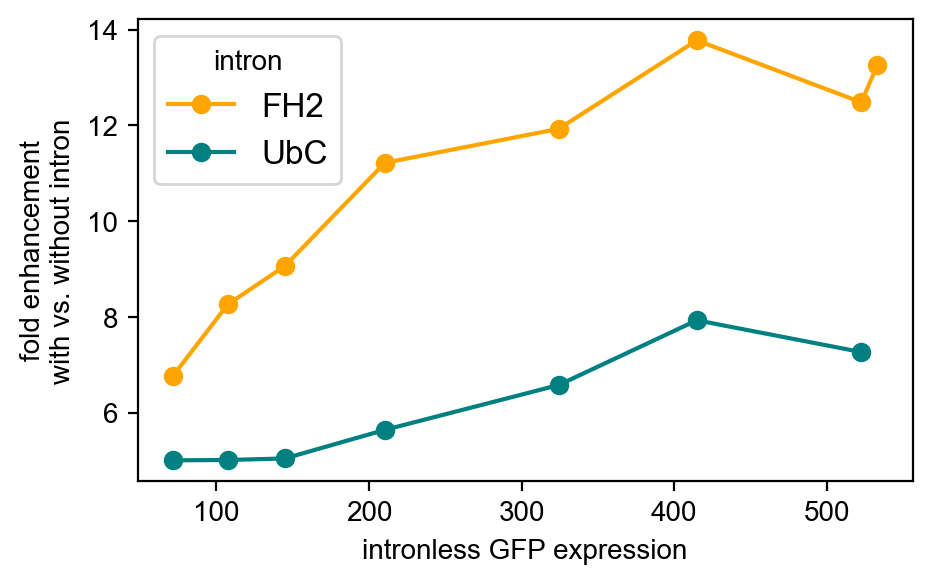

In [18]:
plt.figure(figsize=(5,3))

plt.plot(intless_expression,IME['FH2'], '-o', c ='orange', label='FH2')
plt.plot(intless_expression,IME['UbC'], '-o', c ='teal', label='UbC')

#plt.xlim(-1,5)
#plt.ylim(-1,16)
plt.xlabel('intronless GFP expression')
plt.ylabel('fold enhancement\nwith vs. without intron')
plt.legend(title='intron', loc=2, fontsize=12)
plt.show()

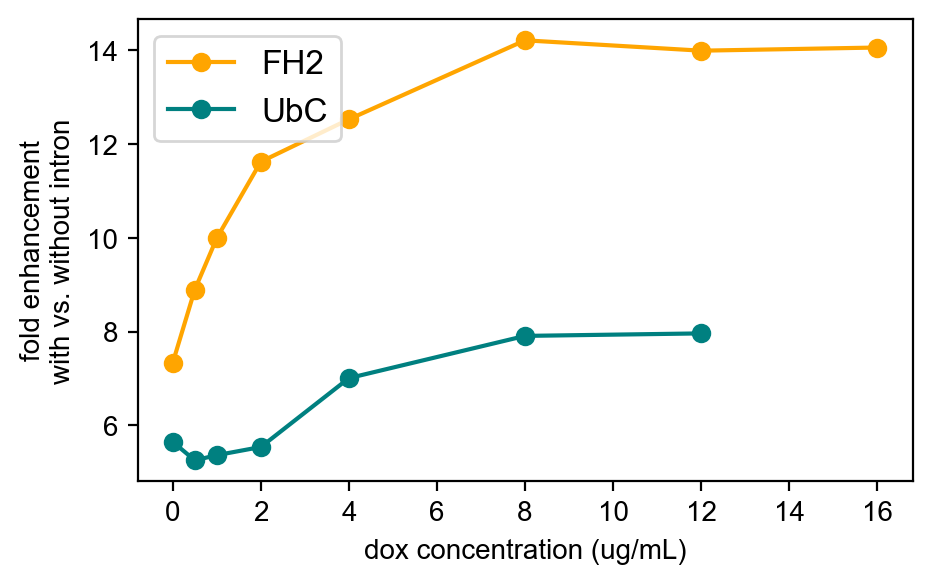

In [20]:
plt.figure(figsize=(5,3))

dox_ints = [0, 0.5, 1, 2, 4, 8, 12, 16]

plt.plot(dox_ints,IME_ratio['FH2'], '-o', c ='orange', label='FH2')
plt.plot(dox_ints,IME_ratio['UbC'], '-o', c ='teal', label='UbC')

#plt.xlim(-1,5)
#plt.ylim(-1,16)
plt.xlabel('dox concentration (ug/mL)')
plt.ylabel('fold enhancement\nwith vs. without intron')
plt.legend(loc=2, fontsize=12)
plt.show()

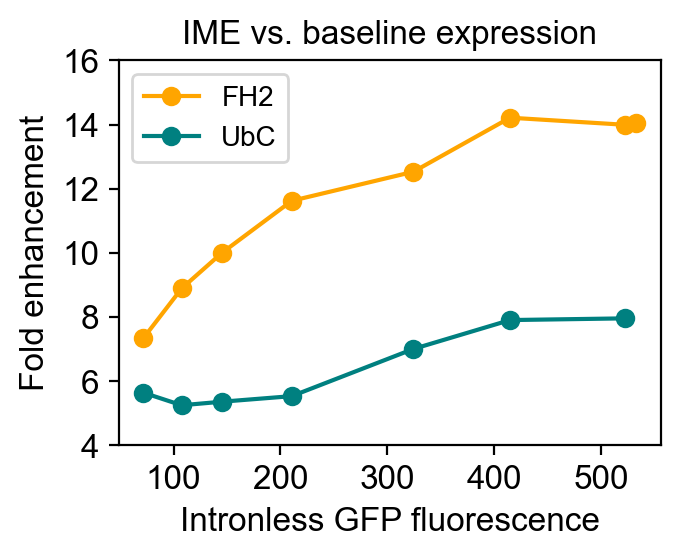

In [58]:
plt.figure(figsize=(3.5,2.5))

plt.plot(intless_expression,IME_ratio['FH2'], '-o', c ='orange', label='FH2')
plt.plot(intless_expression,IME_ratio['UbC'], '-o', c ='teal', label='UbC')

plt.ylabel('Fold enhancement',fontsize=12)
plt.xlabel('Intronless GFP fluorescence',fontsize=12)
plt.title('IME vs. baseline expression')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(4,16)
plt.legend(loc=2, fontsize=10)

plt.savefig('figures/Fig7I.png', dpi=900, bbox_inches='tight')

plt.show()

In [55]:
median_GFP = {}
for intron in ['intronless','FH2','UbC']:
    median_GFP[intron] = []
    for dox in doxes:
        int_GFP = np.median(plot_df.Value[plot_df.dox==dox][plot_df.cell==intron])
        median_GFP[intron].append(int_GFP)

/Users/emmakowal/miniconda3/envs/random_IME_screens_meta_analysis/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emmakowal/miniconda3/envs/random_IME_screens_meta_analysis/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


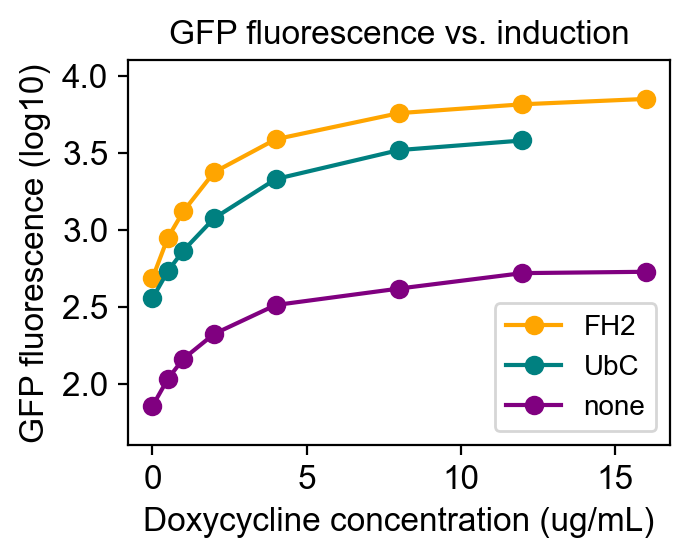

In [59]:
plt.figure(figsize=(3.5,2.5))

plt.plot(dox_ints,[np.log10(x) for x in median_GFP['FH2']], '-o', c ='orange', label='FH2')
plt.plot(dox_ints,[np.log10(x) for x in median_GFP['UbC']], '-o', c ='teal', label='UbC')
plt.plot(dox_ints,[np.log10(x) for x in median_GFP['intronless']], '-o', c ='purple', label='none')

plt.xlabel('Doxycycline concentration (ug/mL)',fontsize=12)
plt.ylabel('GFP fluorescence (log10)',fontsize=12)
plt.title('GFP fluorescence vs. induction')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(1.6,4.1)
plt.legend(loc=4, fontsize=10)

plt.savefig('figures/Fig7H.png', dpi=900, bbox_inches='tight')

plt.show()